# Calorimétrie

## Texte du TP

![](https://www.pcsi2.net/cpge/wp-content/uploads/physique/Calorimetrie.pdf)

## Masse en eau du calorimètre


### Objectif de la manipulation :
Mesurer la masse en eau $\mu$ (ou la capacité thermique $C_{cal}=\mu.c_e$) du calorimètre

### Protocole
- On pèse $m_0$ la masse du (vase du) calorimètre vide à la balance électronique (à 0,01 g près).
- Toujours sur la balance, on ajoute de l'eau (quelques centaines de grammes) dans le calorimètre.
- On mesure la masse obtenue $m_{01}$ pour en déduire la masse d'eau ajoutée : on mesure $m_1+m_0$ à la balance.
- Après équilibre thermique, on mesure la température $T_1$ de l'eau dans le calorimètre à l'aide d'un thermomètre à 0,1 °C près.
- On chauffe (à l'aide d'une bouilloire) de l'eau dont on récupère une certaine masse dans un becher en pyrex.
- Après homogénéisation, on mesure $T_2$ à l'aide du thermomètre, on vérifie $T_1$ et on place $m_2$ dans le calorimètre qu'on referme aussitôt.
- On mesure la température finale $T_f$ dès qu'elle se stabilise.
- On détermine $m_2$ à la balance par différence : on mesure $m_{012}=m_0+m_1+m_2$.

### Exploitation
Le système { eau froide (masse $m_1$, température $T_1$) + eau chaude $(m_2,T_2)$ + calorimètre $(\mu, T_1)$ } subit une transformation supposée adiabatique monobare.

L'application du premier principe de la thermodynamique dans le cas monobare avec équilibre mécanique dans l'état initial et final se traduit ici par $$\Delta H=W_\text{autre}+Q=0+0=0$$

Comme $H$ est une fonction extensive et qu'on travaille avec des des phases condensées, on en déduit :
$$\Delta H_1+\Delta H_2+\Delta H_{cal}=0 \Rightarrow m_1.c_e(T_f-T_1)+m_2.c_e(T_f-T_2)+\mu.c_e(T_f-T_1)=0$$
et finalement,
$$\mu=\frac{m_2(T_2-T_f)}{T_f-T_1}-m_1$$

On cherche à calculer écart type sur $\mu$ connaissant celui sur $m_1$, $m_2$, $T_1$, $T_2$ et $T_f$.

Pour cela on propose d'utiliser la méthode de Monte-Carlo.

On lieu de mesurer $N$ fois la valeur de $m_0$ par des méthodes indépendantes, on effectue $N$ tirages "autour" de $m_0$ pour obtenir une population de $N$ de ces valeurs.
On doit indiquer 
- la valeur du meilleur estimateur (la valeur mesurée) $<m_0>$
- son incertitude type (caractérisant la variabilité potentielle de la valeur mesurée) $u(m_0)$
- éventuellement la "forme de la distribution" (on prendra normale par défaut)

On utilise alors le module numpy de python. Il contient random.randn(N) (tirage de N valeurs qui donne une distribution de forme normale) et permet en outre de faire des calculs très facilement sur des tableaux de valeurs.
Le module matplotlib.pyplot nous permettra quant à lui de tracer les distributions sous forme d'histogrammes.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

N=10000


Par exemple si vous avez mesuré $m_0=97,01$ g à l'aide de la balance précise à $0.1$ g vous construirez le tableau de $N$ valeurs avec l'instruction m0=63.05+0.01*np.random.randn(N) . Ici vous avez obtenu :

In [2]:
m0=97.01+0.1*np.random.randn(N)

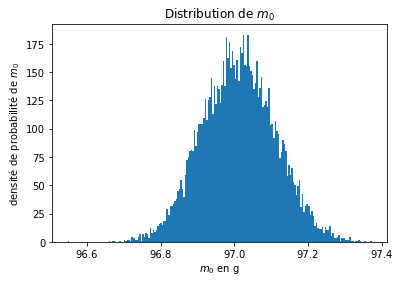

In [3]:
plt.figure()
plt.clf()
plt.title("Distribution de $m_0$")
plt.hist(m0,bins=200)
plt.xlabel("$m_0$ en g")
plt.ylabel("densité de probabilité de $m_0$")
plt.show()

Et on retrouve ainsi la valeur du meilleur estimateur de $m_0$ et son incertitude type.

In [4]:
print("m_0=",m0.mean()," et u(m_0)=",m0.std())

m_0= 97.01138888122934  et u(m_0)= 0.09942944589496788


Faire de même pour $T_1$, $T_2$ et $T_f$ qu'on a obtenu par mesure directe.

In [5]:
T1=26.3+0.1*0.1*np.random.randn(N)
T2=56.3+0.1*np.random.randn(N)
Tf=38.6+0.1*np.random.randn(N)

La valeur de $m_1$ est déduite de la mesure de $m_0$ et $m_0+m_1=m_{01}$ à la balance.
On doit donc calculer $m_1$ et son incertitude en utilisant une formule de propagation des incertitudes du type $$m_1=m_{01}-m_0 \Rightarrow u(m_1)=\sqrt{u(m_{01})^2+u(m_1)^2}$$ ou en générant une liste de liste des valeurs possibles de $m_1$ avant d'en calculer l'écart type (on trouvera la même valeur : $0.01*\sqrt{2}$ ici).

Ici par exemple, si on a mesuré $m_1+m_0=158,13$ g on détermine.

In [6]:
m01=323.7+0.1*np.random.randn(N)
m1=m01-m0
print("m_1=",m1.mean()," et u(m_1)=",m1.std())

m_1= 226.68954844415887  et u(m_1)= 0.14171535190610915


Déterminer $m_2$ et son écart type de la même manière.

In [7]:
m012=517.9+0.1*np.random.randn(N)
m2=m012-m01
print("m_2=",m2.mean()," et u(m_2)=",m2.std())

m_2= 194.20032020476083  et u(m_2)= 0.14077535230934757


On peut maintenant calculer $\mu$ en utilisant la méthode de Monte-Carlo pour tenir compte de la propagation des incertitudes plutôt que des formules plus complexes du type 
$$c=a.b \Rightarrow u(c)=c.\sqrt{\frac{u(a)^2}{a^2}+\frac{u(b)^2}{b^2}}$$
dès qu'on combine des sommes et des produits comme ici.

Déterminer $\mu$ en g et son écart type $u(\mu)$.

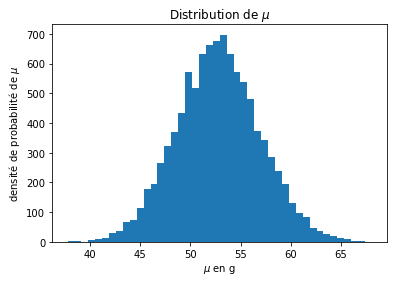

In [8]:
mu=m2*(T2-Tf)/(Tf-T1)-m1

plt.figure()
plt.clf()
plt.title("Distribution de $\mu$")
plt.hist(mu,bins='rice')
plt.xlabel("$\mu$ en g")
plt.ylabel("densité de probabilité de $\mu$")
plt.show()

In [9]:
print("mu=",mu.mean()," et u(mu)=",mu.std())


mu= 52.77802693584652  et u(mu)= 4.166809021061026


## Capacité thermique massique de l'eau $c_e$

### Objectif de la manipulation
Mesurer la capacité thermique massique de l'eau $c_e$.

### Protocole
Pour mesurer $c_e$ on ne peut pas se contenter de mélanger des masses d'eau à différentes températures puisque $c_e$ se simplifie dans alors les bilans enthalpiques.

On pourrait utiliser un autre corps de capacité thermique connue mais parmi le matériel dont nous diposons, nous allons plutôt utiliser le résistor et l'alimentation stabilisée. C'est la méthode électrique.

- On place le résistor dans le calorimètre et on pèse la masse $m_0$ obtenue.
- On ajoute une masse $m_e$ d'eau (mesurée par différence) à température ambiante. Le résistor doit être entièrement immergé.
- On mesure la résistance $R$ du résistor à l'aide d'un ohmètre.
- Sans la relier au résistor, on règle la tension $E$ de l'alimentation stabilisée de façon à ne pas dépasser la valeur maximale de la puissance admissible par le résistor.
- L'intensité du courant $I$ qui traverse le résistor sera mesurée au multimètre réglé en ampèremètre, mode DCA.
- On mesure la température $T_i$ de l'eau à l'équilibre thermique.
- On déclenche un chronomètre au moment où l'alimentation est branchée et on attend assez longtemps pour que la température varie de quelques degrés dans le calorimètre fermé. Il faut homogénéiser de façon régulière.
- On relève la durée $\Delta t$ écoulée et la température finale $T_f$ obtenue après homogénéisation.

### Exploitation
Vu la masse du résistor et le matériau dont il est constitué, on néglige sa capacité thermique devant celle de l'eau et du calorimètre.
Le résistor reçoit un travail électrique et le dissipe intégralement en transfert thermique par effet Joule. La puissance dissipée par effet Joule est $P_J=R.I^2$ supposée constante sur $\Delta t$ d'où un travail électrique $W_{elec}=RI^2.\Delta t$.
Le système { Eau ($m_e,T_i$) + Calorimètre ($C_{cal}, T_i$) + Résistor ($C_{R}, T_i$) } subit une transformation supposée adiabatique monobare.

L'application du premier principe de la thermodynamique dans le cas monobare avec équilibre mécanique dans l'état initial et final se traduit ici par $$\Delta H=W_\text{autre}+Q=W_{elec}+0=RI^2.\Delta t$$

Comme $H$ est une fonction extensive et qu'on travaille avec des phases condensées, on en déduit :
$$\Delta H_{eau}+\Delta H_{cal}+\Delta H_{R}=RI^2.\Delta t \Rightarrow m_1.c_e(T_f-T_i)+\mu.c_e(T_f-T_i)+0=RI^2.\Delta t$$
et finalement,
$$ce=\frac{R.I^2.\Delta t}{(m_e+\mu)(T_f-T_i)}$$

Calculer $c_e$ et son écart type connaissant celui sur $m_e$, $\mu$, $T_i$, $T_f$ $I$, $\Delta t$ et $R$.

In [10]:
m0=182.33+0.01*np.random.randn(N)
m0e=428.96+0.01*np.random.randn(N)
me=m0e-m0
Ti=25.5+0.1*np.random.randn(N)
Tf=27.7+0.1*np.random.randn(N)
R=33.6+0.1*np.random.randn(N)
I=0.45+0.01*np.random.randn(N)
Deltat=(6*60+19.0)+0.1*np.random.randn(N)
ce=(R*I**2*Deltat)/((me+mu)*(Tf-Ti))
print("c_e=",ce.mean()," et u(c_e)=",ce.std())

c_e= 3.9368100391413683  et u(c_e)= 0.31690441509521045


On souhaite comparer la valeur mesurée <c_e> à la valeur de référence $c_{e,\rm ref}=4,18$ J.g$^{-1}$.K$^{-1}$.
Pour cela, on va calculer l'écart normalisé $E_n$ (ou Z-score)
$$E_n=\frac{|<c_e>-c_{e,\rm ref}|}{u(c_e)}$$
On admet que si cette valeur est inférieure à 2 alors le processus de mesurage a donné une valeur de $c_e$ compatible avec la valeur de référence.

In [11]:
En=abs(ce.mean()-4.18)/ce.std()
print("Le Z-score de cette mesure est ",En)
if En<2:
    
    print("Bravo, la valeur mesurée est compatible avec celle de référence.")
else:
    print("La valeur mesurée n'est pas compatible avec celle de référence.")

Le Z-score de cette mesure est  0.7673921513070989
Bravo, la valeur mesurée est compatible avec celle de référence.


## Capacité thermique massique d'un métal c

### Objectif de la manipulation
Mesurer la capacité thermique massique $c$ d'un métal

### Protocole
Nous utiliserons à nouveau la méthode des mélanges. La difficulté ici est de déterminer la température initial $T_{m}$ du métal.

- On identifie le métal à son aspect et sa densité : Fer, Cuivre ou Aluminium.
- On pèse la masse $m$ de métal à la balance.
- On place le métal dans un bécher d'eau bouillante placé sur la plaque chauffante, le métal est entièrement immergé dans l'eau bouillante. Un fil permet de la placer puis de le sortir du becher sans se bruler. On attend assez longtemps pour s'assurer qu'il attiendra $T_{m} \sim 100$ °C. On mesurera la température de l'eau bouillante.
- Pendant ce temps, on mesure la masse $m_0$ du calorimètre vide.
- On ajoute une masse $m_e$ d'eau (mesurée par différence) à température ambiante, on mesure sa température $T_e$ dans le calorimètre.
- Quand le métal a atteint $T_m$, on le plonge rapidement dans le calorimètre.
- On mesure la température $T_f$ de l'eau à l'équilibre thermique final.

### Exploitation
Le système { Eau ($m_e,T_e$) + Calorimètre ($C_{cal}, T_e$) + métal ($m, T_i$) } subit une transformation supposée adiabatique monobare.

L'application du premier principe de la thermodynamique dans le cas monobare avec équilibre mécanique dans l'état initial et final se traduit ici par $$\Delta H=W_\text{autre}+Q=0+0=0$$

Comme $H$ est une fonction extensive et qu'on travaille avec des phases condensées, on en déduit :
$$\Delta H_{eau}+\Delta H_{cal}+\Delta H_{m}=0 \Rightarrow m_e.c_e(T_f-T_e)+\mu.c_e(T_f-T_e)+m.c(T_f-T_i)=0$$
et finalement,
$$c=\frac{c_e(m_e+\mu)(T_f-T_e)}{m(T_i-T_f)}$$

Calculer $c$ et son écart type connaissant celui sur $m_e$, $\mu$, $T_i$, $T_f$ et $m$.

In [12]:
m=57.03+0.01*np.random.randn(N)
m0=182.33+0.01*np.random.randn(N)
m0e=428.96+0.01*np.random.randn(N)
me=m0e-m0
Te=33.5+0.1*np.random.randn(N)
Ti=99.5+0.1*np.random.randn(N)
Tf=36.1+0.1*np.random.randn(N)

c=4.18*(me+mu)*(Tf-Te)/(m*(Ti-Tf))
print("Pour l'aluminium, c=",c.mean()," et u(c)=",c.std())

Pour l'aluminium, c= 0.8997102853690206  et u(c)= 0.051310877021746346


Votre mesurage est-il compatible avec la valeur de référence sachant que

| Métal   | Cuivre | Fer | Aluminuim |
|:--------|:------:|:---:|:---------:|
|$c$ (J/g)| 0,385  |0,444| 0,897     |

On calculera l'écart normalisé.


In [13]:
En=abs(c.mean()-0.897)/c.std()
print("Le Z-score de cette mesure est ",En)
if En<2:
    print("Bravo, la valeur mesurée est compatible avec celle de référence.")
else:
    print("La valeur mesurée n'est pas compatible avec celle de référence.")

Le Z-score de cette mesure est  0.05282087398100729
Bravo, la valeur mesurée est compatible avec celle de référence.


## Chaleur latente de fusion de la glace $L_f=\Delta h_{S \to L}$

### Objectif de la manipulation

On cherche enfin à mesurer l'enthalpie massique (ou chaleur latente) de fusion de l'eau, c'est à dire l'énergie nécessaire pour faire passer un kilogramme d'eau solide à l'état de liquide à pression et température constante.
Il faut également s'arranger pour que toute cette masse d'eau fonde dans le calorimètre (plus que du liquide à la fin).

### Protocole

On utilise à nouveau la méthode des mélanges, la difficulté ici étant de déterminer précisément la température et la massse de glace qu'on va ajouter dans le calorimètre.

- On récupère au bureau dans un bécher un mélange de "glace fondante" (une bonne poignés de glaçons en équilibre avec de l'eau liquide), sa température est alors $T_{G}=0,0$ °C à pression atmosphérique.
- Mesurer la masse $m_0$ du calorimètre vide.
- Placer une masse $m_e$ d'eau relativement chaude dans le calorimètre.
- On mesure la masse $m_{0e}$ pour en déduire $m_e$.
- On mesure la température $T_i$ de l'eau dans le calorimètre.
- On ajoute calmement dans le calorimètre des glaçons qu'on éssuie un par un (pour éviter d'introduire de l'eau liquide).
- On surveille que la température de l'eau liquide n'approche pas 0°C mais varie suffisamment pour gagner en précision.
- On relève la température $T_f$ à l'équilibre thermique final.
- On mesure la masse $m_{0eG}$ du calorimètre plein pour en déduire la masse $m_G$ de glace ajoutée.

### Exploitation
Le système { Eau liquide ($m_e,T_e$) + Calorimètre ($C_{cal},T_e$) + Eau solide ($m_G$,T_G$) } subit une transformation supposée adiabatique monobare.


L'application du premier principe de la thermodynamique dans le cas monobare avec équilibre mécanique dans l'état initial et final se traduit ici par $$\Delta H=W_\text{autre}+Q=0+0=0$$

Comme $H$ est une fonction extensive et qu'on travaille avec des phases condensées et un changement d'état, on en déduit :
$$\Delta H_{eau}+\Delta H_{cal}+\Delta H_{G}=0 \Rightarrow m_e.c_e(T_f-T_e)+\mu.c_e(T_f-T_e)+m_GL_f+m_G.c_e(T_f-T_G)=0$$
Attention, il ne faut pas oublier le dernier terme qui traduit la variation d'enthalpie de l'eau initialement solide, qui a fondu et qui passe ensuite de $T_G=0,0$°C à $T_f$.
Finalement,
$$L_f=\frac{(m_e+\mu)c_e(T_e-T_f)}{m_G}-c_e(T_f-T_G)$$

Calculer $L_f=\Delta h_f$ et son écart type connaissant celui sur $m_e$, $\mu$, $T_e$, $T_f$ et $m_G$.

In [18]:
m0=97.85+0.1*np.random.randn(N)
m0e=352.55+0.01*np.random.randn(N)
me=m0e-m0
m0eG=440.71+0.1*np.random.randn(N)
mG=m0eG-m0e
Te=36.4+0.1*np.random.randn(N)
TG=0.4+0.1*np.random.randn(N)
Tf=8.8+0.1*np.random.randn(N)

Lf=4.18*(me+mu)*(Te-Tf)/(mG)-4.18*(Tf-TG)
print("L_f=",Lf.mean()," et u(Lf)=",Lf.std())

L_f= 367.2959562810947  et u(Lf)= 5.945353392208584


Calculer l'écart normalisé $E_n$ et conclure sachant que la valeur attentue est $L_f=335$ J.g$^{-1}$

In [19]:
En=abs(Lf.mean()-335)/Lf.std()
print("Le Z-score de cette mesure est ",En)
if En<2:
    print("Bravo, la valeur mesurée est compatible avec celle de référence.")
else:
    print("La valeur mesurée n'est pas compatible avec celle de référence.")

Le Z-score de cette mesure est  5.4321339961756845
La valeur mesurée n'est pas compatible avec celle de référence.
